# MINOR PROJECT : CardioVison: AI for heart failure prediction


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_csv('heart.csv')

In [51]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [52]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4995,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4999,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0


In [53]:
df.shape

(5000, 13)

In [54]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [55]:
df.duplicated().sum()

3680

In [56]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [58]:
df.nunique()

age                          48
anaemia                       2
creatinine_phosphokinase    290
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   203
serum_creatinine             43
serum_sodium                 27
sex                           2
smoking                       2
time                        155
DEATH_EVENT                   2
dtype: int64

In [59]:
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
print(numerical_columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [60]:
descrete_features=[]
continous_features=[]
for i in df.columns:
    if(df[i].dtype in ('int64','float64')):
        if(df[i].nunique() <10):
            descrete_features.append(i)
        else:
            continous_features.append(i)

In [61]:
print('discrete_features :' ,descrete_features)

discrete_features : ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']


In [62]:
print('continous_features:',continous_features)

continous_features: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


In [63]:
for i in descrete_features:
    print(i)
    print(df[i].unique())

anaemia
[0 1]
diabetes
[0 1]
high_blood_pressure
[0 1]
sex
[1 0]
smoking
[1 0]
DEATH_EVENT
[0 1]


In [64]:
for i in descrete_features:
    print(i)
    print(df[i].value_counts())

anaemia
anaemia
0    2628
1    2372
Name: count, dtype: int64
diabetes
diabetes
0    2803
1    2197
Name: count, dtype: int64
high_blood_pressure
high_blood_pressure
0    3176
1    1824
Name: count, dtype: int64
sex
sex
1    3228
0    1772
Name: count, dtype: int64
smoking
smoking
0    3441
1    1559
Name: count, dtype: int64
DEATH_EVENT
DEATH_EVENT
0    3432
1    1568
Name: count, dtype: int64


In [65]:
df_copy=df.copy()

In [66]:
df_copy=df_copy.drop_duplicates()

In [67]:
for i in descrete_features:
    print(i)
    print(df_copy[i].value_counts())

anaemia
anaemia
0    679
1    641
Name: count, dtype: int64
diabetes
diabetes
0    730
1    590
Name: count, dtype: int64
high_blood_pressure
high_blood_pressure
0    832
1    488
Name: count, dtype: int64
sex
sex
1    852
0    468
Name: count, dtype: int64
smoking
smoking
0    914
1    406
Name: count, dtype: int64
DEATH_EVENT
DEATH_EVENT
0    923
1    397
Name: count, dtype: int64


In [68]:
df=df.drop_duplicates()

In [69]:
target='DEATH_EVENT'

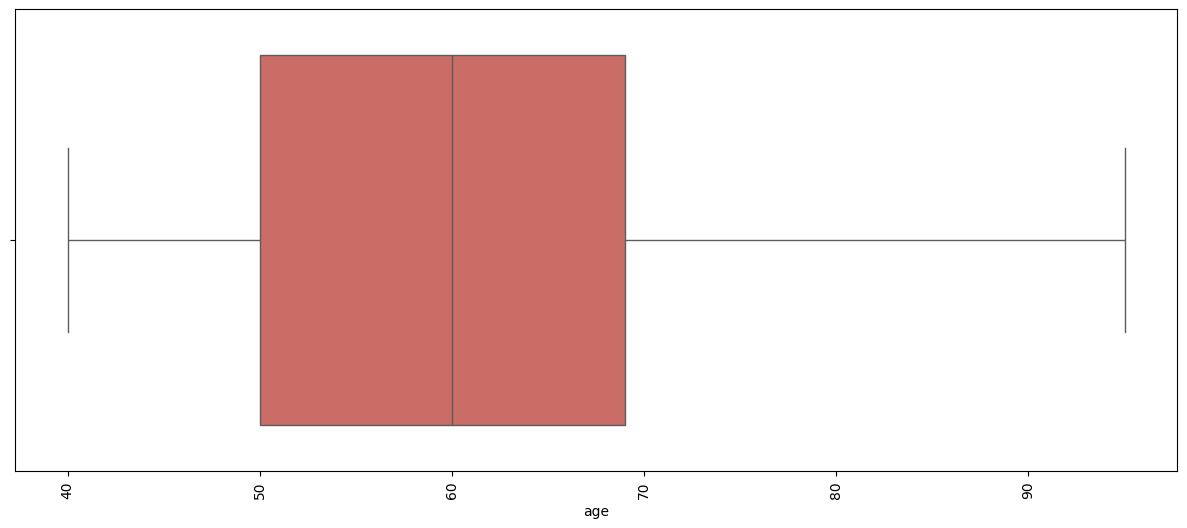

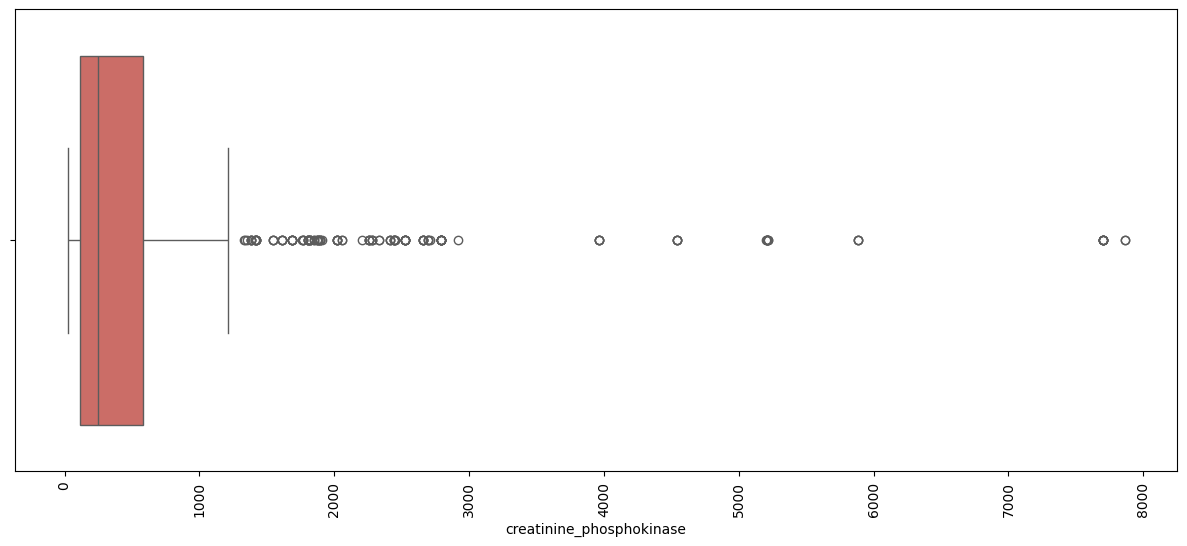

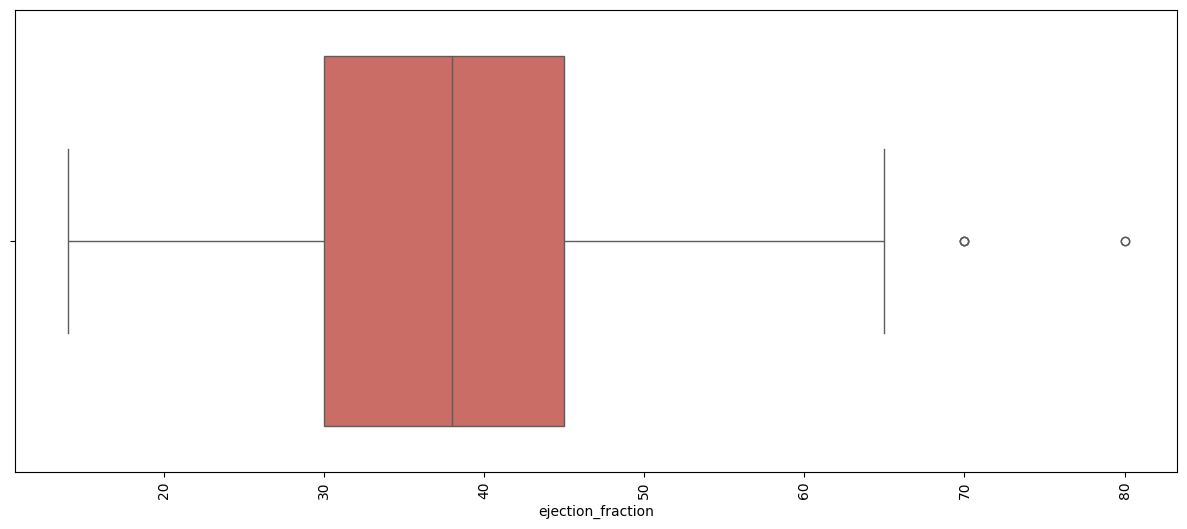

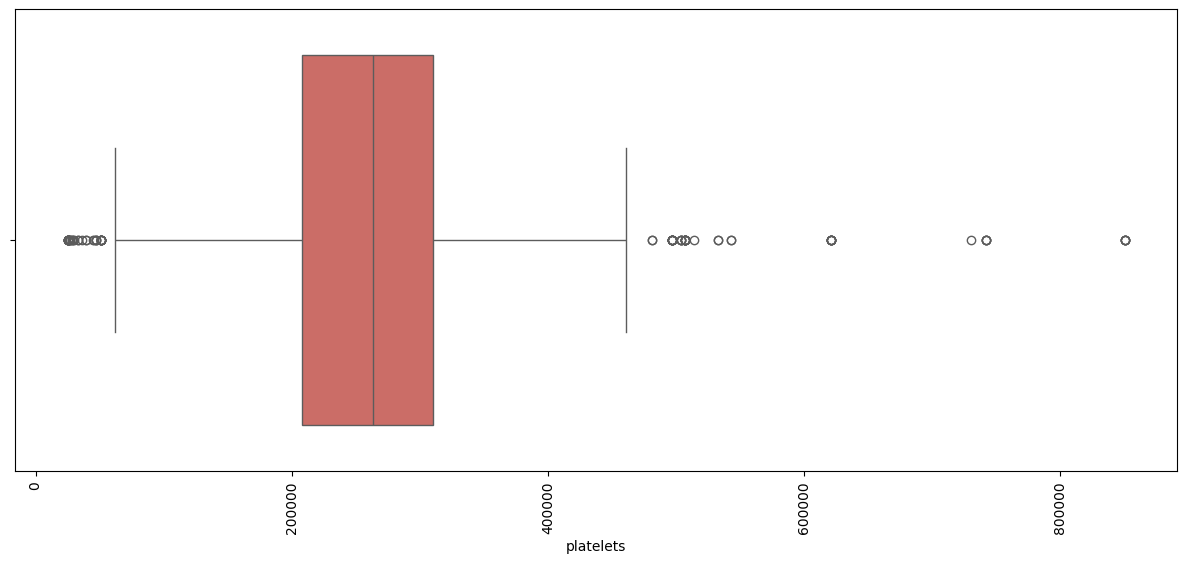

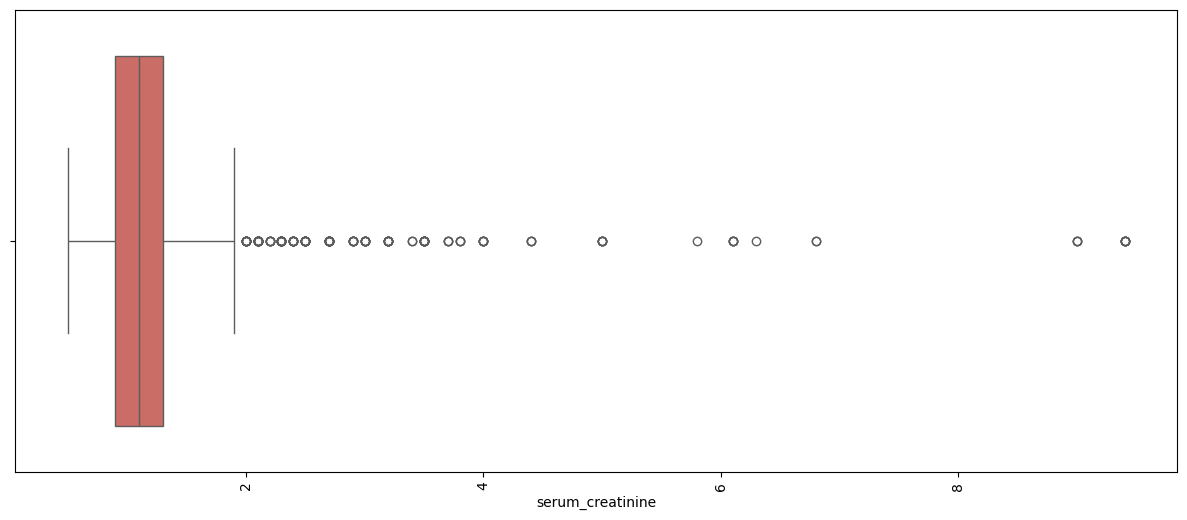

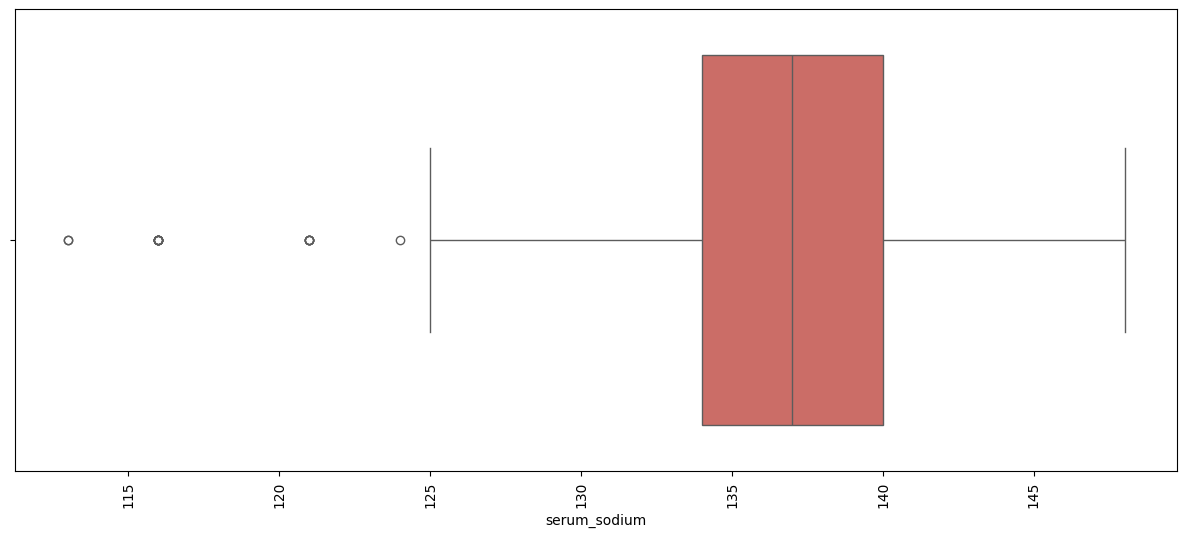

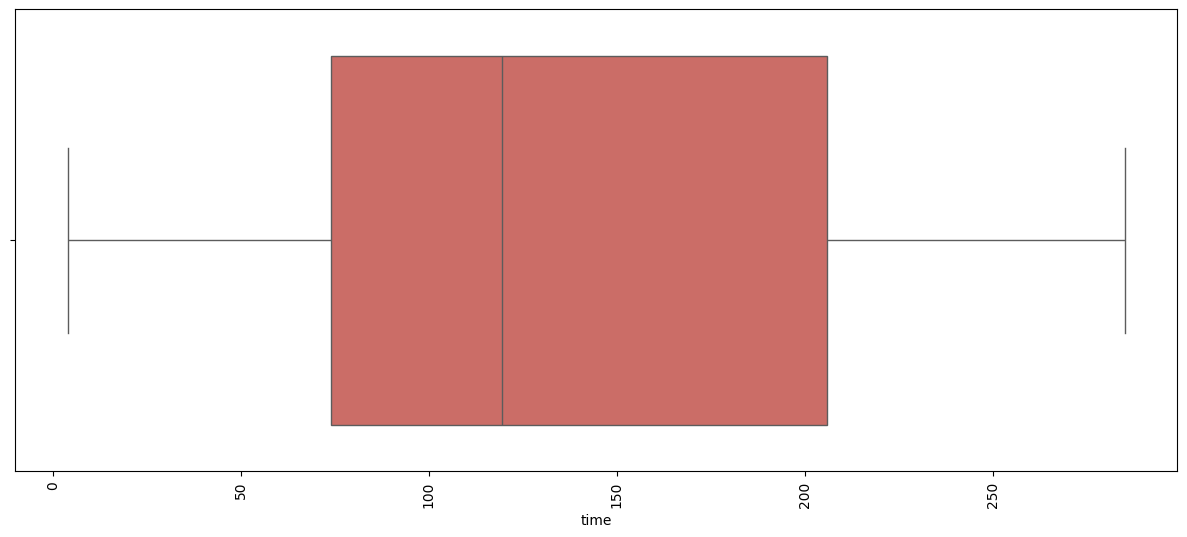

In [70]:
for i in continous_features:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

In [71]:
correlation_matrix = df.corr()

In [72]:
correlation_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.108039,-0.098890,-0.077437,0.057771,0.122868,-0.009855,0.197325,-0.044933,0.059648,0.022495,-0.198010,0.224602
anaemia,0.108039,1.000000,-0.200294,0.031989,0.024339,0.047177,-0.006089,0.003655,-0.003755,-0.037188,-0.056350,-0.097733,0.063510
creatinine_phosphokinase,-0.098890,-0.200294,1.000000,-0.042517,0.002157,-0.004945,0.015418,-0.018248,0.047212,0.061105,-0.002144,0.019553,0.055221
diabetes,-0.077437,0.031989,-0.042517,1.000000,0.012477,-0.038261,0.044104,-0.063715,-0.095644,-0.149128,-0.222771,0.008653,-0.001485
ejection_fraction,0.057771,0.024339,0.002157,0.012477,1.000000,0.049202,0.083884,-0.060202,0.194937,-0.143921,0.002126,0.086484,-0.271767
high_blood_pressure,0.122868,0.047177,-0.004945,-0.038261,0.049202,1.000000,-0.004260,0.013098,0.037283,-0.065553,-0.078545,-0.219173,0.113721
platelets,-0.009855,-0.006089,0.015418,0.044104,0.083884,-0.004260,1.000000,0.023062,0.065051,-0.090300,0.043759,-0.001018,-0.044523
serum_creatinine,0.197325,0.003655,-0.018248,-0.063715,-0.060202,0.013098,0.023062,1.000000,-0.263781,0.037234,0.020209,-0.165679,0.290229
serum_sodium,-0.044933,-0.003755,0.047212,-0.095644,0.194937,0.037283,0.065051,-0.263781,1.000000,-0.047862,0.011111,0.130820,-0.250990
sex,0.059648,-0.037188,0.061105,-0.149128,-0.143921,-0.065553,-0.090300,0.037234,-0.047862,1.000000,0.411603,0.017673,0.044045


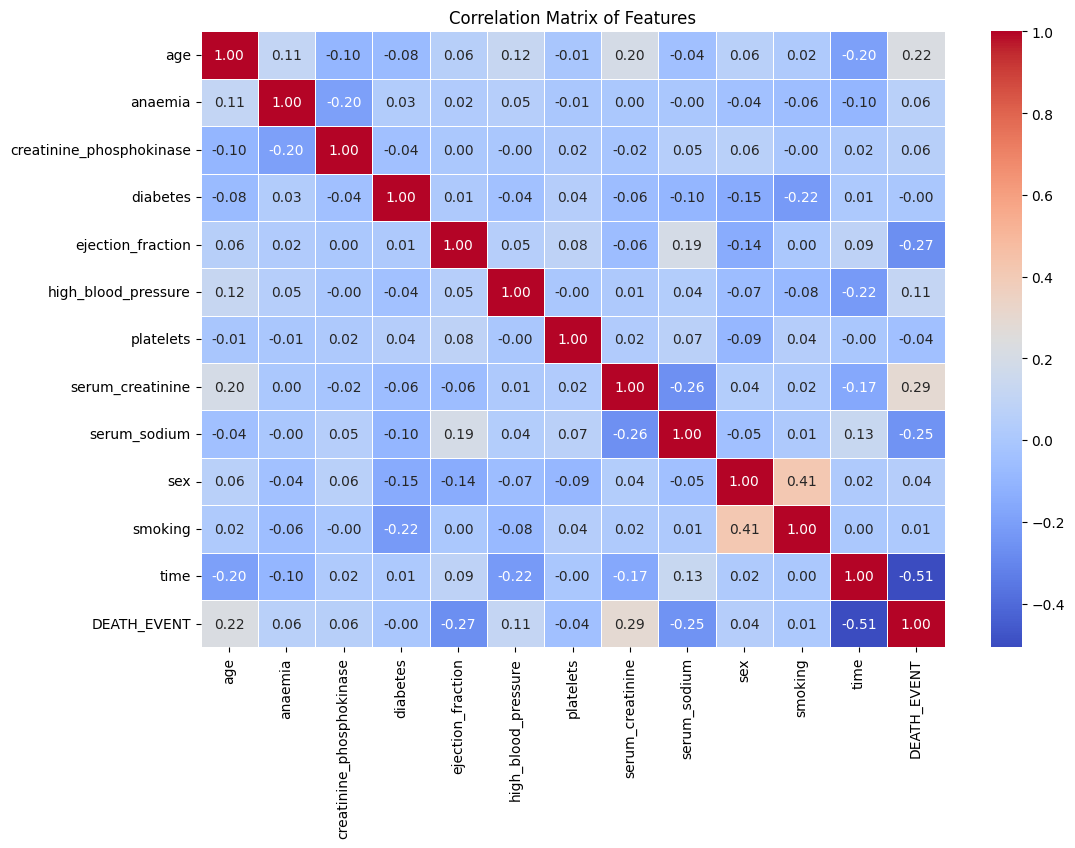

In [73]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [74]:
correlation_with_target = df.corr()[target]

In [75]:
correlation_with_target

age                         0.224602
anaemia                     0.063510
creatinine_phosphokinase    0.055221
diabetes                   -0.001485
ejection_fraction          -0.271767
high_blood_pressure         0.113721
platelets                  -0.044523
serum_creatinine            0.290229
serum_sodium               -0.250990
sex                         0.044045
smoking                     0.006774
time                       -0.507374
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

In [76]:
X = df_copy.drop('DEATH_EVENT',axis=1)
Y = df_copy['DEATH_EVENT']

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, Y_train,Y_test=train_test_split(X,Y)

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)

In [102]:
from sklearn.metrics import classification_report

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [84]:
from sklearn.metrics import accuracy_score

In [87]:
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9575757575757575


In [105]:
print(classification_report(Y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       236
           1       0.93      0.91      0.92        94

    accuracy                           0.96       330
   macro avg       0.95      0.94      0.95       330
weighted avg       0.96      0.96      0.96       330



In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [90]:
log_reg_pred = log_reg_model.predict(X_test)
log_reg_accuracy = accuracy_score(Y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

Logistic Regression Accuracy: 0.793939393939394


In [104]:
print(classification_report(Y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       236
           1       0.61      0.79      0.69        94

    accuracy                           0.79       330
   macro avg       0.76      0.79      0.77       330
weighted avg       0.82      0.79      0.80       330



In [92]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_resampled, y_train_resampled)

SVC()

In [95]:
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(Y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.6666666666666666


In [103]:
print(classification_report(Y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       236
           1       0.39      0.31      0.35        94

    accuracy                           0.67       330
   macro avg       0.57      0.56      0.56       330
weighted avg       0.65      0.67      0.65       330



In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [99]:
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(Y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9151515151515152


In [101]:
print(classification_report(Y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       236
           1       0.84      0.87      0.85        94

    accuracy                           0.92       330
   macro avg       0.89      0.90      0.90       330
weighted avg       0.92      0.92      0.92       330



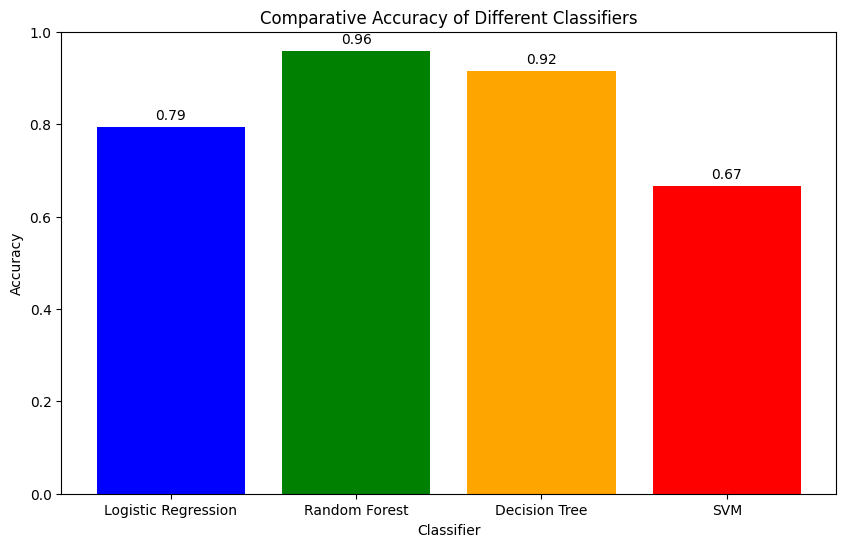

In [106]:
classifiers = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM']

accuracies = [log_reg_accuracy, rf_accuracy, dt_accuracy, svm_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange', 'red'])

plt.title('Comparative Accuracy of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

plt.ylim(0, 1)  
plt.show()

In [107]:
import pickle
with open('rf_model_heartup.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [108]:
import sys

python_version = sys.version

numpy_version = np.__version__

pandas_version = pd.__version__

print(f"Python version: {python_version}")
print(f"NumPy version: {numpy_version}")
print(f"Pandas version: {pandas_version}")


Python version: 3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]
NumPy version: 1.26.4
Pandas version: 2.2.2


In [109]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.5.0
